In [7]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)

**REQUIREMENT: DRAW A CHART THAT SHOW CASE THE JOB DEMAND OF EACH ROLE EACH MONTH**
* **What we need:** A table that contain the job title in columns name and month (Jan, Feb...) in index row
* **Steps:** Create a month column with string format --> Create table that showcase the size --> Sort the top 3 most demanded job --> Draw

In [30]:
# Create month column in the original dataframe
dfvn = df[df['job_country']=="Vietnam"].copy()
dfvn['job_posted_month']=dfvn.job_posted_date.dt.strftime('%B')
dfvn.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",March
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",August
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado...",January
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",October
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic...",November


In [ ]:
#Draw a table that showcases the size of each job title in each month + sort the month from Jan to Dec
dfvn = df[df['job_country']=="Vietnam"].copy()
dfvn['job_posted_month']=dfvn.job_posted_date.dt.strftime('%B')
dfvn_pivot=dfvn.pivot_table(
    index = 'job_posted_month',
    columns='job_title_short',
    aggfunc='size'

)
dfvn_pivot.reset_index(inplace = True)
dfvn_pivot['month_no']=pd.to_datetime(dfvn_pivot['job_posted_month'], format='%B')
dfvn_pivot['month_no']=dfvn_pivot.month_no.dt.month
dfvn_pivot.sort_values(by='month_no',inplace=True)
dfvn_pivot.set_index('job_posted_month',inplace=True)
dfvn_pivot.drop(columns='month_no',inplace=True)
dfvn_pivot['Cloud Engineer'].median()
dfvn_pivot['Cloud Engineer']=dfvn_pivot['Cloud Engineer'].fillna(3.5)


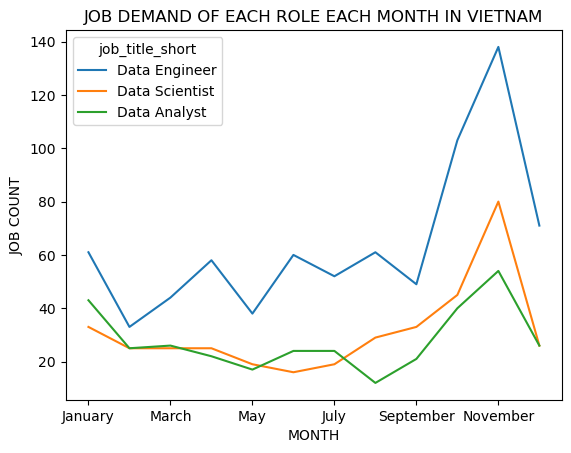

In [147]:
top_job=dfvn.job_title_short.value_counts()
top_job=top_job.head(3).index.to_list()
dfvn_pivot[top_job].plot(kind='line')
plt.xlabel('MONTH')
plt.ylabel('JOB COUNT')
plt.title('JOB DEMAND OF EACH ROLE EACH MONTH IN VIETNAM')
plt.show()